## Phishing URL Detection


In [1]:
import pandas as pd

In [2]:
url = pd.read_csv("phishing_website_dataset.csv")

## Taking a look at the dataset

In [3]:
url.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [4]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         188637 non-null  object 
 1   URLLength                   188637 non-null  int64  
 2   Domain                      188637 non-null  object 
 3   DomainLength                188637 non-null  int64  
 4   IsDomainIP                  188637 non-null  int64  
 5   TLD                         188637 non-null  object 
 6   URLSimilarityIndex          188637 non-null  float64
 7   CharContinuationRate        188637 non-null  float64
 8   TLDLegitimateProb           188637 non-null  float64
 9   URLCharProb                 188637 non-null  float64
 10  TLDLength                   188637 non-null  int64  
 11  NoOfSubDomain               188637 non-null  int64  
 12  HasObfuscation              188637 non-null  int64  
 13  NoOfObfuscated

In [5]:
url['IsResponsive'].value_counts()

IsResponsive
1    119603
0     69034
Name: count, dtype: int64

In [122]:
url['URLLength'].value_counts()

URLLength
26      9980
25      9455
24      9342
27      9250
23      8898
        ... 
501        1
309        1
1004       1
414        1
441        1
Name: count, Length: 426, dtype: int64

In [7]:
url.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,...,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000
mean,34.164326,21.369445,0.002486,79.353178,0.849141,0.261557,0.055930,2.762258,1.163950,0.001993,...,0.242975,0.023855,0.500125,26.713142,6.347154,10.815068,67.319858,2.437099,50.759978,0.589868
std,39.916861,9.033410,0.049800,28.663823,0.214566,0.251490,0.010513,0.597423,0.593343,0.044601,...,0.428881,0.152599,0.500001,75.828138,12.128622,17.548149,187.760312,18.296732,168.241387,0.491859
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001174,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.729877,0.687500,0.006970,0.051070,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,10.000000,2.000000,6.000000,17.000000,0.000000,11.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062976,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,16.000000,91.000000,1.000000,60.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,7641.000000,1041.000000,2828.000000,27397.000000,4887.000000,27516.000000,1.000000


## Converting objects into int data dtype using LabelEncoder for further processing

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_features = ['Domain' , 'TLD', 'Title']
for feature in object_features:
    url[feature] = le.fit_transform(url[feature])
print(url)

                                                      URL  URLLength  Domain  \
0                        https://www.southbankmosaics.com         31  150718   
1                                https://www.uni-mainz.de         23  165163   
2                          https://www.voicefmradio.co.uk         29  169109   
3                             https://www.sfnmjournal.com         26  146657   
4                      https://www.rewildingargentina.org         33  139772   
...                                                   ...        ...     ...   
188632                    https://www.life-in-ecuador.com         30  107871   
188633                      https://www.winchester.gov.uk         28  172182   
188634                    https://www.nononsensedesign.be         30  123785   
188635  https://patient-cell-40f5.updatedlogmylogin.wo...         55   25178   
188636                 https://www.alternativefinland.com         33   40905   

        DomainLength  IsDomainIP  TLD  

In [9]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         188637 non-null  object 
 1   URLLength                   188637 non-null  int64  
 2   Domain                      188637 non-null  int32  
 3   DomainLength                188637 non-null  int64  
 4   IsDomainIP                  188637 non-null  int64  
 5   TLD                         188637 non-null  int32  
 6   URLSimilarityIndex          188637 non-null  float64
 7   CharContinuationRate        188637 non-null  float64
 8   TLDLegitimateProb           188637 non-null  float64
 9   URLCharProb                 188637 non-null  float64
 10  TLDLength                   188637 non-null  int64  
 11  NoOfSubDomain               188637 non-null  int64  
 12  HasObfuscation              188637 non-null  int64  
 13  NoOfObfuscated

In [10]:
url = url.drop(columns=['URL'])

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'URLLength'}>,
        <Axes: title={'center': 'Domain'}>,
        <Axes: title={'center': 'DomainLength'}>,
        <Axes: title={'center': 'IsDomainIP'}>,
        <Axes: title={'center': 'TLD'}>,
        <Axes: title={'center': 'URLSimilarityIndex'}>,
        <Axes: title={'center': 'CharContinuationRate'}>],
       [<Axes: title={'center': 'TLDLegitimateProb'}>,
        <Axes: title={'center': 'URLCharProb'}>,
        <Axes: title={'center': 'TLDLength'}>,
        <Axes: title={'center': 'NoOfSubDomain'}>,
        <Axes: title={'center': 'HasObfuscation'}>,
        <Axes: title={'center': 'NoOfObfuscatedChar'}>,
        <Axes: title={'center': 'ObfuscationRatio'}>],
       [<Axes: title={'center': 'NoOfLettersInURL'}>,
        <Axes: title={'center': 'LetterRatioInURL'}>,
        <Axes: title={'center': 'NoOfDegitsInURL'}>,
        <Axes: title={'center': 'DegitRatioInURL'}>,
        <Axes: title={'center': 'NoOfEqualsInURL'}>,
        <Axes: title={'

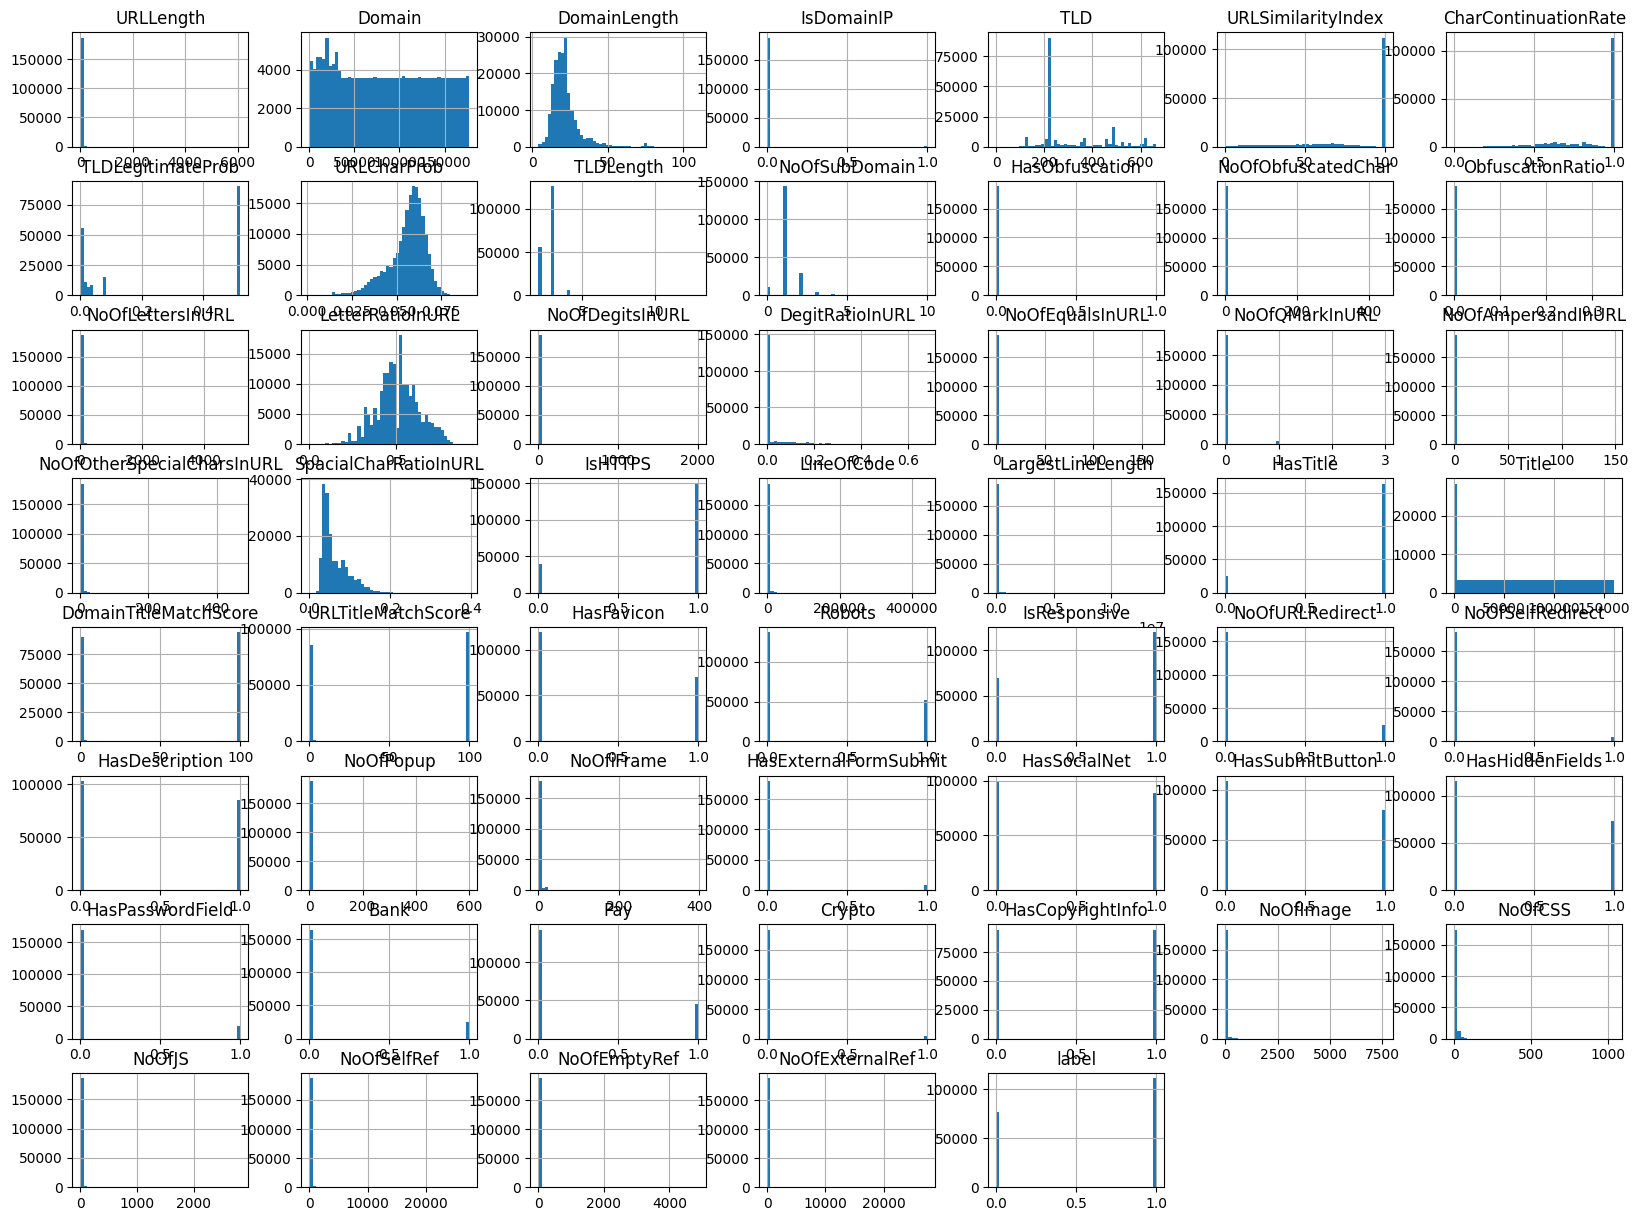

In [13]:
url.hist(bins = 50 , figsize=(20,15))

In [14]:
len(url)

188637

In [15]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(url , test_size=0.2 , random_state=42)
print(f"Rows in train set : {len(train_set)} \n Rows in test set : {len(test_set)}")

Rows in train set : 150909 
 Rows in test set : 37728


## Seeing the correlation of all the feautres with "label" so as to decide further model 

In [16]:
corr_matrix = url.corr()
corr_matrix['label'].sort_values(ascending=False)

label                         1.000000
URLSimilarityIndex            0.863846
HasSocialNet                  0.777756
HasCopyrightInfo              0.738494
HasDescription                0.685045
IsHTTPS                       0.614960
DomainTitleMatchScore         0.581879
HasSubmitButton               0.572799
IsResponsive                  0.548472
URLTitleMatchScore            0.536632
HasHiddenFields               0.501282
HasFavicon                    0.487833
Domain                        0.475295
NoOfJS                        0.471331
URLCharProb                   0.468956
CharContinuationRate          0.468576
HasTitle                      0.464883
NoOfCSS                       0.406142
Robots                        0.387359
Pay                           0.355191
Title                         0.311601
NoOfSelfRef                   0.296721
NoOfImage                     0.284226
LineOfCode                    0.267379
NoOfiFrame                    0.265330
NoOfExternalRef          

In [17]:
## Here in the correlation , i saw that some imp features(IsHTTPS,HasSocialNet,HasDescription,HasCopyrightInfo) are having values either 0 or 1 , so it's necessary to part them equally in both the train and test set

In [18]:
# we are doing this because it can happen if a data contains 280 points , it genearte 0 at 250 points and 1 at 30 points , 
# so for its equal districution in both train and test set we are doing this
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(url,url['IsHTTPS'] ):
    strat_train_set = url.loc[train_index]
    strat_test_set = url.loc[test_index]
for train_index , test_index in split.split(url,url['HasDescription'] ):
    strat_train_set = url.loc[train_index]
    strat_test_set = url.loc[test_index]
for train_index , test_index in split.split(url,url['HasSocialNet'] ):
    strat_train_set = url.loc[train_index]
    strat_test_set = url.loc[test_index]
for train_index , test_index in split.split(url,url['HasCopyrightInfo'] ):
    strat_train_set = url.loc[train_index]
    strat_test_set = url.loc[test_index]


In [19]:
strat_test_set['IsHTTPS'].value_counts()

IsHTTPS
1    29913
0     7815
Name: count, dtype: int64

In [20]:
strat_train_set['IsHTTPS'].value_counts()

IsHTTPS
1    119450
0     31459
Name: count, dtype: int64

In [21]:
a = 29913/7815
b = 119450/31459
print(a,b)

3.8276391554702496 3.797005626370832


In [22]:
strat_test_set['HasSocialNet'].value_counts()

HasSocialNet
0    19907
1    17821
Name: count, dtype: int64

In [23]:
strat_train_set['HasSocialNet'].value_counts()

HasSocialNet
0    79993
1    70916
Name: count, dtype: int64

In [24]:
c = 19907/17821
d = 79993/70916
print(c,d)

1.1170529151001627 1.127996502904845


In [25]:
## so i have basically splittes the data uniformly for the imp featues which were having binary values

In [26]:
# features depending positively on label : - 

# URLSimilarityIndex            0.863846
# URL                           0.812641
# HasSocialNet                  0.777756
# HasCopyrightInfo              0.738494
# HasDescription                0.685045
# IsHTTPS                       0.614960

# features depending negatively on label : - 

# URLLength                    -0.238626
# NoOfLettersInURL             -0.258596
# DomainLength                 -0.285115
# LetterRatioInURL             -0.367976
# NoOfOtherSpecialCharsInURL   -0.377710
# DegitRatioInURL              -0.436415
# SpacialCharRatioInURL        -0.534179

In [27]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='label', ylabel='label'>,
        <Axes: xlabel='URLSimilarityIndex', ylabel='label'>,
        <Axes: xlabel='HasSocialNet', ylabel='label'>,
        <Axes: xlabel='SpacialCharRatioInURL', ylabel='label'>,
        <Axes: xlabel='DegitRatioInURL', ylabel='label'>],
       [<Axes: xlabel='label', ylabel='URLSimilarityIndex'>,
        <Axes: xlabel='URLSimilarityIndex', ylabel='URLSimilarityIndex'>,
        <Axes: xlabel='HasSocialNet', ylabel='URLSimilarityIndex'>,
        <Axes: xlabel='SpacialCharRatioInURL', ylabel='URLSimilarityIndex'>,
        <Axes: xlabel='DegitRatioInURL', ylabel='URLSimilarityIndex'>],
       [<Axes: xlabel='label', ylabel='HasSocialNet'>,
        <Axes: xlabel='URLSimilarityIndex', ylabel='HasSocialNet'>,
        <Axes: xlabel='HasSocialNet', ylabel='HasSocialNet'>,
        <Axes: xlabel='SpacialCharRatioInURL', ylabel='HasSocialNet'>,
        <Axes: xlabel='DegitRatioInURL', ylabel='HasSocialNet'>],
       [<Axes: xlabel='label', ylabel='

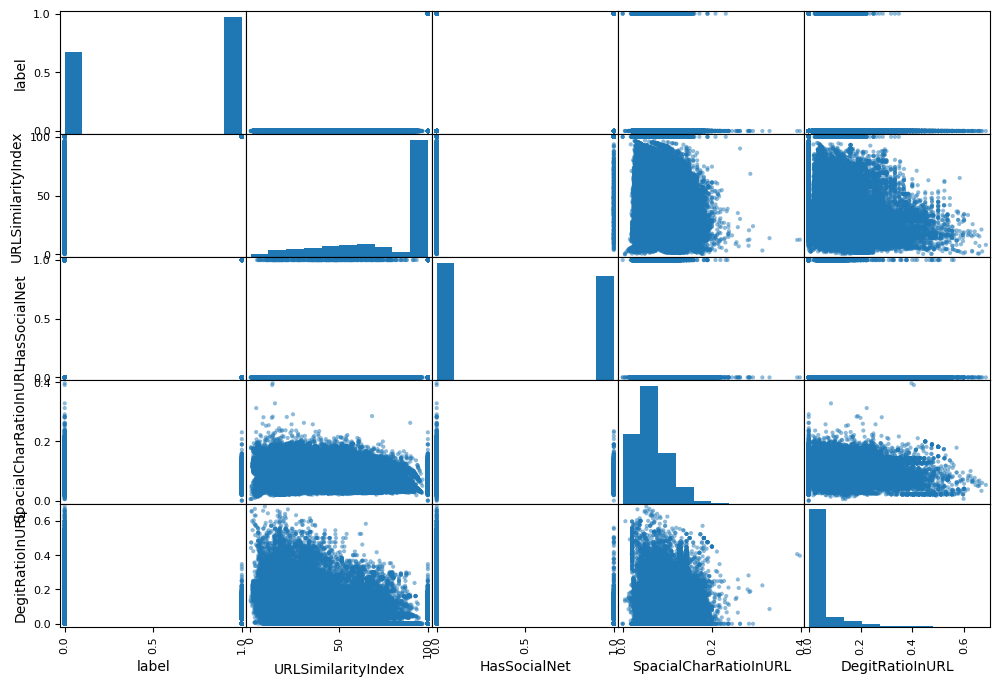

In [28]:
attributes = ["label","URLSimilarityIndex","HasSocialNet","SpacialCharRatioInURL","DegitRatioInURL"]
scatter_matrix(url[attributes] , figsize = (12,8))

In [29]:
url = strat_train_set.drop("label",axis=1)
url_labels = strat_train_set["label"].copy()

## Missing Attributes

In [30]:
missing_values = url.isnull().sum()

print(missing_values)

URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots  

In [31]:
# therefore there are no missing attributes , so no need to worry,but in the new test data there is a possibility there can be missing values , so using simple imputer to resolve this

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(url)

SimpleImputer(strategy='median')

In [33]:
X = imputer.transform(url)

In [34]:
url_tr = pd.DataFrame(X , columns = url.columns)
url_tr.describe()

,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,...,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000,150909.000000
mean,34.155133,85215.127381,21.383032,0.002498,304.337177,79.372061,0.848946,0.261179,0.055917,2.763056,...,0.129654,0.242371,0.023736,0.500123,26.768099,6.360191,10.816485,67.122080,2.457607,50.301327
std,40.262760,52408.617975,9.054273,0.049920,141.513963,28.653947,0.214730,0.251455,0.010509,0.599822,...,0.335924,0.428519,0.152226,0.500002,78.164209,12.321265,17.666378,179.505703,19.146882,147.369537
min,13.000000,0.000000,4.000000,0.000000,0.000000,0.155574,0.000000,0.000000,0.001174,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,37364.000000,16.000000,0.000000,217.000000,58.799036,0.687500,0.006411,0.051046,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,84059.000000,20.000000,0.000000,217.000000,100.000000,1.000000,0.079963,0.058106,3.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,2.000000,6.000000,17.000000,0.000000,11.000000
75%,34.000000,130809.000000,24.000000,0.000000,433.000000,100.000000,1.000000,0.522907,0.062957,3.000000,...,0.000000,0.000000,0.000000,1.000000,30.000000,8.000000,16.000000,91.000000,1.000000,60.000000
max,6097.000000,177606.000000,110.000000,1.000000,666.000000,100.000000,1.000000,0.522907,0.090824,13.000000,...,1.000000,1.000000,1.000000,1.000000,7641.000000,1041.000000,2828.000000,27397.000000,4887.000000,27516.000000


## Feature Scaling

In [35]:
# using standardalization , (val-mean)/std 

In [36]:
# Creating a pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")) ,
    ('std_scaler',StandardScaler()) ,
])

In [38]:
url_num_tr = my_pipeline.fit_transform(url)

In [39]:
url_num_tr

array([[ 0.49288555, -0.98348898,  0.73081403, ..., -0.35721591,
        -0.12835588, -0.3345433 ],
       [ 0.12033161, -1.30918077,  0.95170495, ..., -0.37392852,
        -0.12835588, -0.34132898],
       [ 0.26935319, -1.2284495 ,  1.61437769, ..., -0.37392852,
        -0.12835588, -0.32097193],
       ...,
       [-0.25222232,  0.75817691, -0.37364053, ..., -0.37392852,
        -0.12835588, -0.34132898],
       [-0.4012439 , -0.66205223, -1.14675873, ..., -0.06195969,
         0.0805561 , -0.20561527],
       [-0.12803768, -0.19499009,  0.17858675, ..., -0.37392852,
        -0.12835588, -0.34132898]])

In [40]:
url_num_tr.shape

(150909, 53)

## Selecting a desired model for phishing website

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
# model = LinearRegression()
# model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model = LogisticRegression()


model.fit(url_num_tr , url_labels)

LogisticRegression()

In [95]:
url.size

7998177

In [97]:
some_data =url.iloc[0:]

In [99]:
some_labels = url_labels.iloc[0:]

In [100]:
prepared_data = my_pipeline.transform(some_data)

In [101]:
model.predict(prepared_data)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
import numpy as np
def final_value(url_num_tr, model):
    # Get the predictions from the model
    url_predictions = model.predict(url_num_tr)
    
    # Apply the threshold to convert probabilities to binary values
    binary_predictions = np.where(url_predictions < 0.5, 0, 1)
    
    return binary_predictions

In [103]:
final_predictions = final_value(url_num_tr , model)

In [104]:
final_value(prepared_data,model)

array([0, 0, 0, ..., 0, 1, 0])

In [121]:
# list(some_labels)

## evalutaint the model

In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np
url_predictions = final_value(url_num_tr , model)
mse = mean_squared_error(url_labels , url_predictions)
rmse = np.sqrt(mse)

In [107]:
mse

7.951812019163867e-05

In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , url_num_tr , url_labels , scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [109]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [110]:
print_scores(rmse_scores)

Scores: [0.00814031 0.01628062 0.00814031 0.01151214 0.00814031 0.00814031
 0.01409943 0.00814031 0.01151214 0.        ]
Mean: 0.009410588417199233
Standard deviation: 0.004179028993927842


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [112]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


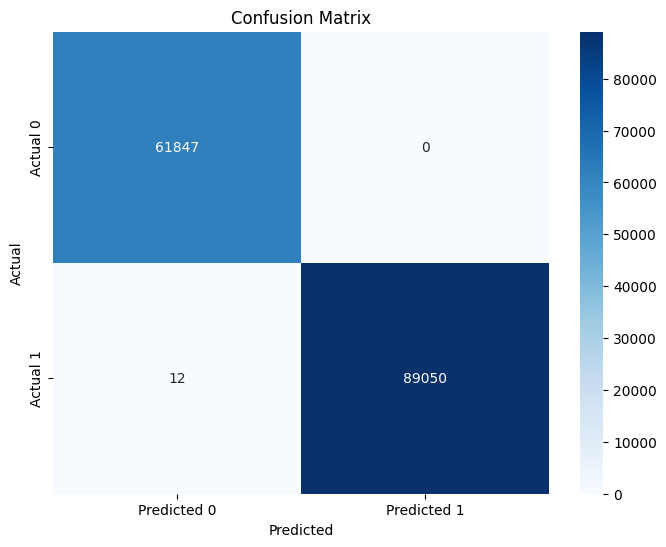

In [113]:
plot_confusion_matrix(final_predictions,url_labels)

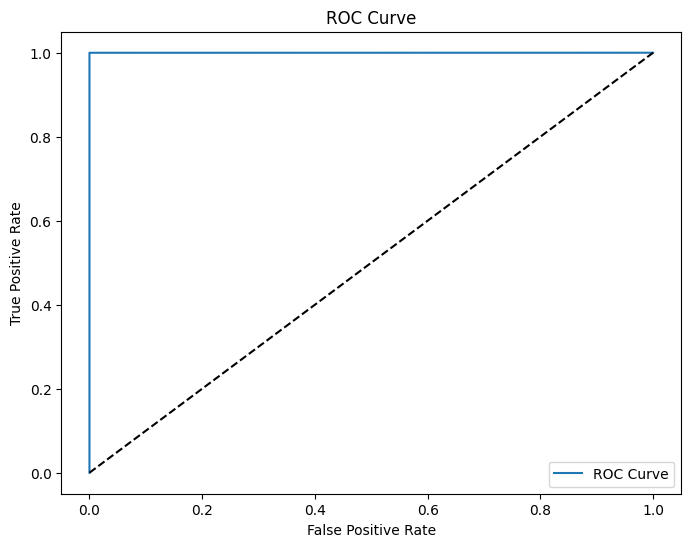

AUC: 0.9999326312007366


In [123]:

from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    print(f'AUC: {roc_auc_score(y_true, y_pred_proba)}')

plot_roc_curve(final_predictions,url_labels)


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_train and y_train_pred are the true labels and predictions for the training set
# Assuming y_test and y_test_pred are the true labels and predictions for the test set

# Calculate metrics for the training set
train_accuracy = accuracy_score(final_predictions,url_labels)
train_precision = precision_score(final_predictions,url_labels)
train_recall = recall_score(final_predictions,url_labels)
train_f1 = f1_score(final_predictions,url_labels)

# Calculate metrics for the test set
test_accuracy = accuracy_score(final_predictions,url_labels)
test_precision = precision_score(final_predictions,url_labels)
test_recall = recall_score(final_predictions,url_labels)
test_f1 = f1_score(final_predictions,url_labels)

# Print the results
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")


Training Set Metrics:
Accuracy: 0.9999204818798083
Precision: 1.0
Recall: 0.9998652624014731
F1 Score: 0.9999326266618757

Test Set Metrics:
Accuracy: 0.9999204818798083
Precision: 1.0
Recall: 0.9998652624014731
F1 Score: 0.9999326266618757


## Saving the model

In [118]:
from joblib import dump, load
dump(model , 'phishing_website.joblib')

['phishing_website.joblib']

## Tryng the model

In [119]:
prepared_data[3]

array([-0.10320075,  0.62518308,  0.17858675, -0.05004449,  1.2625144 ,
        0.71990107,  0.70346398, -0.72067188,  0.81346627,  0.39502559,
       -0.27699326, -0.04334542, -0.01412152, -0.03378459, -0.07134322,
        0.43176983, -0.17196782, -0.39449205, -0.07172775, -0.14834345,
       -0.02998587, -0.39798054, -0.92556806,  0.51319141, -0.12652999,
       -0.02085262,  0.39140864,  0.51657943,  0.98234212,  0.9460319 ,
        1.30282632,  1.63296588,  0.75932014, -0.39165627, -0.20342993,
        1.09945019, -0.05996115, -0.12917013, -0.21779263,  1.0620718 ,
       -0.85763847, -0.79370553, -0.33983749, -0.38596468, -0.56560378,
       -0.15592711, -1.00024521, -0.17614384,  0.21424895,  0.5198318 ,
       -0.08424317, -0.12835588,  0.16081174])

In [120]:
from joblib import dump , load
import numpy as np
model = load('phishing_website.joblib')
features = np.array([[ -0.10320075,  0.62518308,  0.17858675, -0.05004449,  1.2625144 ,
        0.71990107,  0.70346398, -0.72067188,  0.81346627,  0.39502559,
       -0.27699326, -0.04334542, -0.01412152, -0.03378459, -0.07134322,
        0.43176983, -0.17196782, -0.39449205, -0.07172775, -0.14834345,
       -0.02998587, -0.39798054, -0.92556806,  0.51319141, -0.12652999,
       -0.02085262,  0.39140864,  0.51657943,  0.98234212,  0.9460319 ,
        1.30282632,  1.63296588,  0.75932014, -0.39165627, -0.20342993,
        1.09945019, -0.05996115, -0.12917013, -0.21779263,  1.0620718 ,
       -0.85763847, -0.79370553, -0.33983749, -0.38596468, -0.56560378,
       -0.15592711, -1.00024521, -0.17614384,  0.21424895,  0.5198318 ,
       -0.08424317, -0.12835588,  0.16081174]])
model.predict(features)

array([1], dtype=int64)